(https://maria-miura1-streamlit.onrender.com)

Importación de librerías

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from pickle import dump
warnings.filterwarnings('ignore')

from pickle import dump

import streamlit as st

import warnings

Carga de datos

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df = df[(df['Insulin'] >= 15) & (df['Insulin'] <= 400)]  # mantener valores fisiológicamente válidos

# SkinThickness: eliminar ceros y valores extremos (alta correlación con BMI pero baja con Outcome)
df = df[(df['SkinThickness'] >= 10) & (df['SkinThickness'] <= 60)]

# DiabetesPedigreeFunction: valores > 2 son outliers raros sin mucha correlación con Outcome
df = df[df['DiabetesPedigreeFunction'] <= 2]

In [61]:

X = df.drop("Outcome", axis=1)  
y = df["Outcome"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sel = X_train.copy() 
X_test_sel = X_test.copy()   


X_train_sel["Outcome"] = y_train.values 
X_test_sel["Outcome"] = y_test.values   


X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
713,0,134,58,20,291,26.4,0.352,21,0
405,2,123,48,32,165,42.1,0.520,26,0
165,6,104,74,18,156,29.9,0.722,41,1
187,1,128,98,41,58,32.0,1.321,33,1
740,11,120,80,37,150,42.3,0.785,48,1


In [62]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,134,58,20,291,26.4,0.352,21,0
1,2,123,48,32,165,42.1,0.520,26,0
2,6,104,74,18,156,29.9,0.722,41,1
3,1,128,98,41,58,32.0,1.321,33,1
4,11,120,80,37,150,42.3,0.785,48,1


In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Puedes cambiar k según lo que quieras
X_train_kbest = selector.fit_transform(X_train, y_train)

# Aplicar la transformación al conjunto de prueba
X_test_kbest = selector.transform(X_test)

# Ver qué columnas fueron seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("Features seleccionadas:", selected_features)


Features seleccionadas: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


In [64]:
model_kbest = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_kbest.fit(X_train_kbest, y_train)


# Evaluar
y_pred_kbest = model_kbest.predict(X_test_kbest)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_kbest))
print(classification_report(y_test, y_pred_kbest))


Accuracy: 0.6351351351351351
              precision    recall  f1-score   support

           0       0.74      0.73      0.73        51
           1       0.42      0.43      0.43        23

    accuracy                           0.64        74
   macro avg       0.58      0.58      0.58        74
weighted avg       0.64      0.64      0.64        74



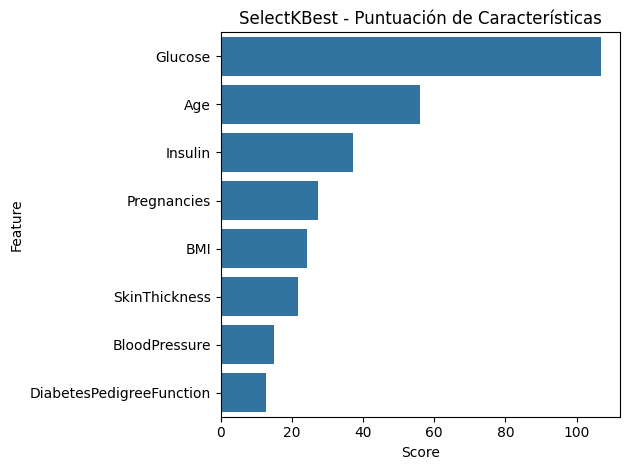

In [65]:
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

sns.barplot(data=feature_scores, x='Score', y='Feature')
plt.title("SelectKBest - Puntuación de Características")
plt.tight_layout()
plt.show()

In [66]:

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

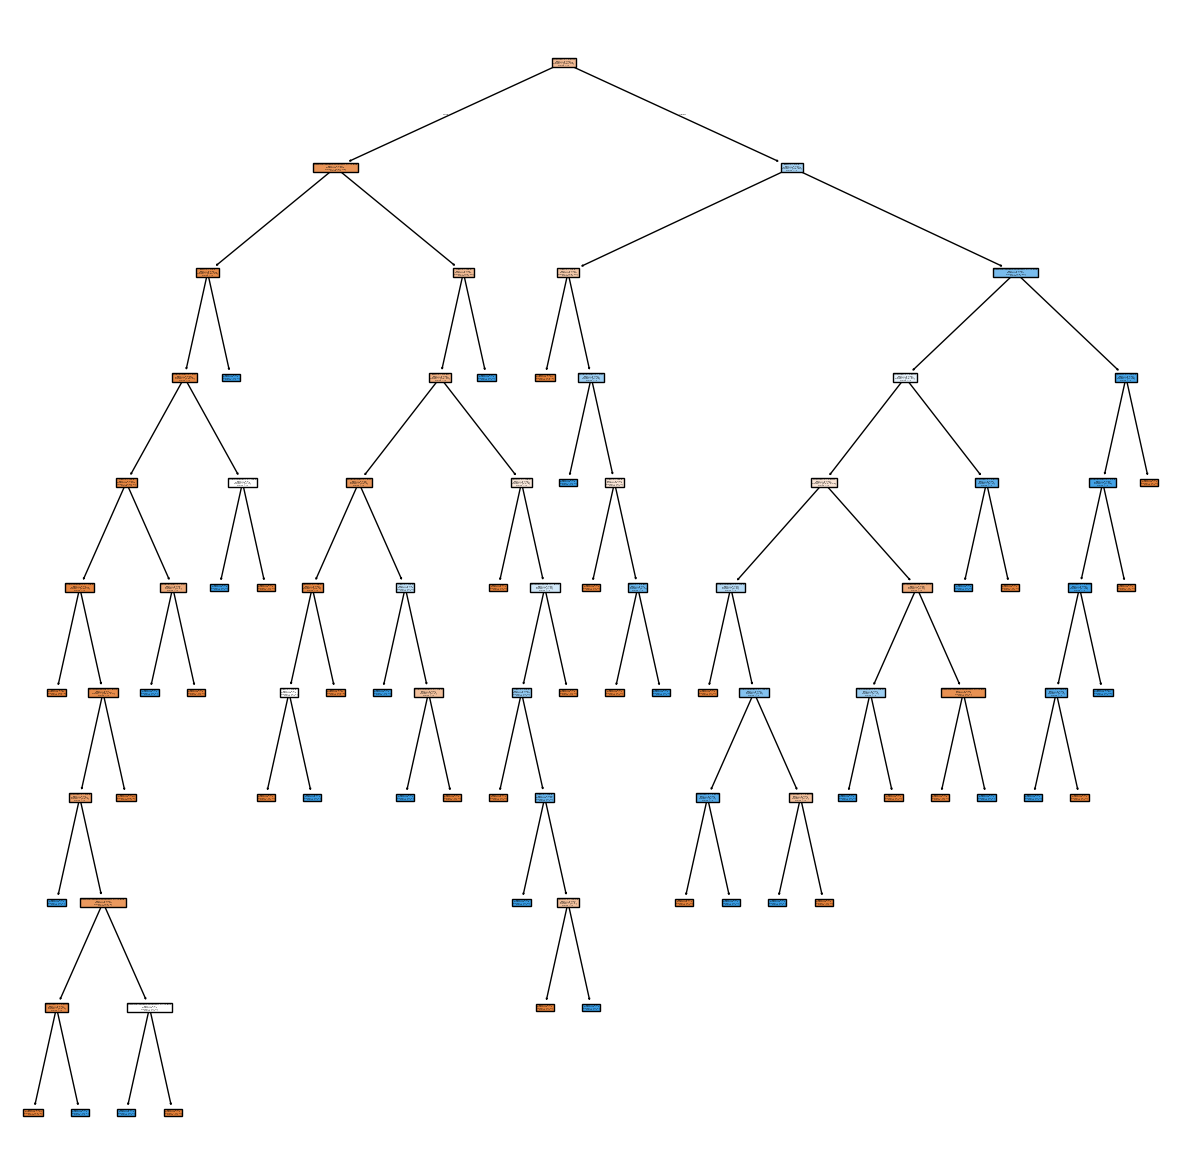

In [67]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.show()

In [68]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0])

In [69]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0])

In [70]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

In [71]:
accuracy_score(y_test, y_pred_test)

0.6621621621621622

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Paso 1: Define el modelo base y la selección de características
model = DecisionTreeClassifier()

# Paso 2: Crea el pipeline
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),  # selección de características
    ('clf', model)  # clasificador
])

# Paso 3: Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'select__k': [5, 8, 'all'],  # cuántas características seleccionar
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 15],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': [None, 'sqrt', 'log2'],
    'clf__class_weight': [None, 'balanced'],
    'clf__random_state': [42]
}

# Paso 4: Configura el GridSearchCV con f1_macro
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Paso 5: Entrena el modelo
grid_search.fit(X_train, y_train)

# Paso 6: Evaluación en test
y_pred = grid_search.best_estimator_.predict(X_test)

print("🔍 Mejores parámetros encontrados:", grid_search.best_params_)

# Métricas
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 F1 Macro:", f1_score(y_test, y_pred, average='macro'))
print("📋 Reporte de clasificación:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
🔍 Mejores parámetros encontrados: {'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__random_state': 42, 'select__k': 8}
📊 Accuracy: 0.6621621621621622
📊 F1 Macro: 0.6433391170233276
📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73        51
           1       0.47      0.70      0.56        23

    accuracy                           0.66        74
   macro avg       0.65      0.67      0.64        74
weighted avg       0.71      0.66      0.67        74



In [73]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))

In [75]:
import streamlit as st
import pandas as pd
import numpy as np


# Título de la aplicación
st.title('Mi Primera Aplicación con Streamlit')

# Subtítulo
st.header('Visualización de Datos de Ejemplo')

# Crear un DataFrame de ejemplo
data = pd.DataFrame({
    'Número': np.arange(1, 11),
    'Aleatorio': np.random.randn(10)
})

# Mostrar el DataFrame
st.write("Aquí hay algunos datos de ejemplo:")
st.write(data)

@st.cache(ttl=60*5, max_entries=20)
def load_data():
    data = pd.read_csv('/workspaces/Maria_Miura1_streamlit/data/processed/clean_train.csv')
    return data

data = load_data()

2025-05-20 17:49:43.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 17:49:43.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar